In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency

## Correlation between two continous variables 

In [2]:
# Create a sample DataFrame with your 10 variables and the target variable
data = {
    'Target':[1,   2,  3,  4,   5,   6,  7,    8,   9, 10,   11,  12],
    'Var1':  [1, 1.5,  2,  4, 4.2, 4.9,  6,  7.8, 7.8,  9,  9.5,  10],
    'Var2':  [0.9, 1.5,  2,  3, 3.1, 3.5,  4,  7.5, 7.5,  7.5,  7.5,  7.9],
    'Var3':  [1.2, 1.2,  7,  5.1, 4.7, 4.3,  5,  7.2, 6.5, 7,  7.4,  7.8]
}
df = pd.DataFrame(data)
df.T

,0,1,2,3,4,5,6,7,8,9,10,11
Target,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Var1,1.0,1.5,2.0,4.0,4.2,4.9,6.0,7.8,7.8,9.0,9.5,10.0
Var2,0.9,1.5,2.0,3.0,3.1,3.5,4.0,7.5,7.5,7.5,7.5,7.9
Var3,1.2,1.2,7.0,5.1,4.7,4.3,5.0,7.2,6.5,7.0,7.4,7.8


In [3]:
correlations = df.corr(method='pearson')
correlations

,Target,Var1,Var2,Var3
Target,1.000000,0.991765,0.956057,0.798460
Var1,0.991765,1.000000,0.974175,0.792619
Var2,0.956057,0.974175,1.000000,0.800810
Var3,0.798460,0.792619,0.800810,1.000000


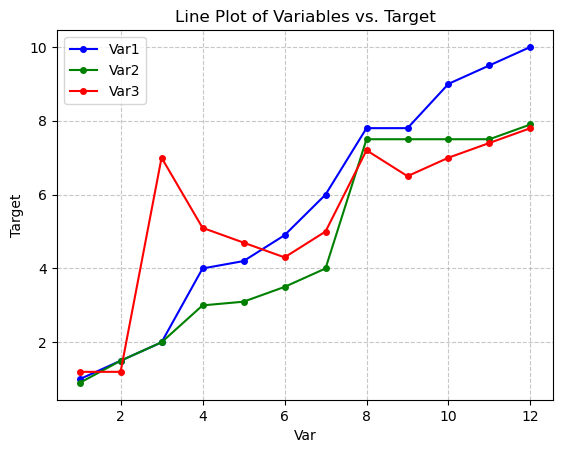

In [4]:
# Create a line plot
plt.plot(df['Target'], df['Var1'], linestyle='-', marker='o', markersize=4, color='b', label='Var1')
plt.plot(df['Target'], df['Var2'], linestyle='-', marker='o', markersize=4, color='g', label='Var2')
plt.plot(df['Target'], df['Var3'], linestyle='-', marker='o', markersize=4, color='r', label='Var3')

# Add labels and a title
plt.xlabel('Var')
plt.ylabel('Target')
plt.title('Line Plot of Variables vs. Target')

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Add a legend
plt.legend(loc='best')

# Show the plot
plt.show()

## Correlation between two Boolean variables 

In [5]:
# Create a sample DataFrame with your 10 variables and the target variable
data = {
    'Var1':   [1,    1,    1,    1,    1,    0,    0,     0,     0,     0,     0,     0    ],
    'Var2':   [1,    1,    1,    0,    0,    0,    1,     1,     1,     0,     0,     0    ],
    'Var3':   [0,    0,    0,    0,    0,    0,    1,     1,     1,     1,     1,     1    ],
    'Target': [1,    1,    1,    1,    1,    1,    0,     0,     0,     0,     0,     0    ]
}
df = pd.DataFrame(data)
df.T

,0,1,2,3,4,5,6,7,8,9,10,11
Var1,1,1,1,1,1,0,0,0,0,0,0,0
Var2,1,1,1,0,0,0,1,1,1,0,0,0
Var3,0,0,0,0,0,0,1,1,1,1,1,1
Target,1,1,1,1,1,1,0,0,0,0,0,0


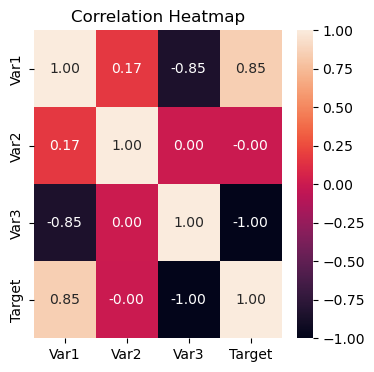

In [6]:
# Extract the correlations of the variables with the target variable
correlations = df.corr(method='pearson')
target_correlations = correlations['Target']

# You can also visualize the correlations if desired
plt.figure(figsize=(4,4))
sns.heatmap(correlations, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# Chi square test for the same
for var in ['Var1', 'Var2', 'Var3', 'Target']:
    print("\nCorrelation between {} and Target".format(var))
    
    # Calculate the point-biserial correlation between Var1 and the Target variable
    corr, p_value = pointbiserialr(df[var], df['Target'])

    # Print the correlation coefficient
    print(f'Point-biserial correlation: {corr:.2f}')

    # Create a contingency table
    contingency_table = pd.crosstab(df[var], df['Target'])

    # Perform the chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print the results
    print(f'\tChi-squared statistic: {chi2:.2f}')
    print(f'\tp-value: {p:.2f}')
    print(f'\tDegrees of freedom: {dof}')
    print('\tExpected frequencies:')
    print(expected)


Correlation between Var1 and Target
Point-biserial correlation: 0.85
	Chi-squared statistic: 5.49
	p-value: 0.02
	Degrees of freedom: 1
	Expected frequencies:
[[3.5 3.5]
 [2.5 2.5]]

Correlation between Var2 and Target
Point-biserial correlation: 0.00
	Chi-squared statistic: 0.00
	p-value: 1.00
	Degrees of freedom: 1
	Expected frequencies:
[[3. 3.]
 [3. 3.]]

Correlation between Var3 and Target
Point-biserial correlation: -1.00
	Chi-squared statistic: 8.33
	p-value: 0.00
	Degrees of freedom: 1
	Expected frequencies:
[[3. 3.]
 [3. 3.]]

Correlation between Target and Target
Point-biserial correlation: 1.00
	Chi-squared statistic: 8.33
	p-value: 0.00
	Degrees of freedom: 1
	Expected frequencies:
[[3. 3.]
 [3. 3.]]


### Categorical 

In [8]:
# P-value 0 means there is no evidence found in favour of Null Hypothesis
# P-value 1 means there is strong evidence found in favour of Null Hypothesis
# Null: There is no association between two variables

In [9]:
data = {
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female'],
    'Preference for Online Shopping': ['Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No']
}

df = pd.DataFrame(data)
display(df.T)

# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Preference for Online Shopping'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f'Chi-squared statistic: {chi2:.2f}')
print(f'p-value: {p:.4f}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

,0,1,2,3,4,5,6,7,8,9
Gender,Male,Male,Male,Male,Male,Female,Female,Female,Female,Female
Preference for Online Shopping,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No


Chi-squared statistic: 1.60
p-value: 0.2059
Degrees of freedom: 1
Expected frequencies:
[[2.5 2.5]
 [2.5 2.5]]


## Interpretation
If you obtain a p-value of 0.2, it means that there is a 20% chance of observing the data you have (or more extreme data) if the null hypothesis were true.
A p-value of 0.2 is greater than the conventional significance level of 0.05 (or any other significance level you may have chosen). Therefore, you do not have enough evidence to reject the null hypothesis.
Interpretation: Based on the data and the chi-squared test, you do not have sufficient statistical evidence to conclude that there is a significant association or dependency between the variables you tested. In other words, the test does not support the presence of a strong relationship.

In [10]:
data = {
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Other', 'Other', 'Other', 'Other'],
    'Preference for Online Shopping': ['No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No']
}

df = pd.DataFrame(data)
display(df.T)

# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Preference for Online Shopping'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f'Chi-squared statistic: {chi2:.2f}')
print(f'p-value: {p:.4f}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

,0,1,2,3,4,5,6,7,8,9,10,11
Gender,Male,Male,Male,Male,Female,Female,Female,Female,Other,Other,Other,Other
Preference for Online Shopping,No,No,No,No,Yes,Yes,Yes,Yes,No,No,No,No


Chi-squared statistic: 12.00
p-value: 0.0025
Degrees of freedom: 2
Expected frequencies:
[[2.66666667 1.33333333]
 [2.66666667 1.33333333]
 [2.66666667 1.33333333]]


## Interpretation
Very strong association

In [11]:
data = {
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Other', 'Other', 'Other', 'Other'],
    'Preference for Online Shopping': ['Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No']
}

df = pd.DataFrame(data)
display(df.T)

# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Preference for Online Shopping'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f'Chi-squared statistic: {chi2:.2f}')
print(f'p-value: {p:.4f}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

,0,1,2,3,4,5,6,7,8,9,10,11
Gender,Male,Male,Male,Male,Female,Female,Female,Female,Other,Other,Other,Other
Preference for Online Shopping,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,No,No


Chi-squared statistic: 2.74
p-value: 0.2537
Degrees of freedom: 2
Expected frequencies:
[[2.33333333 1.66666667]
 [2.33333333 1.66666667]
 [2.33333333 1.66666667]]


## Interpretation
Not strong evidence of association, Failed to reject Null Hypothesis

## Continous and Categorical Association 

In [12]:
import pandas as pd
import scipy.stats as stats

# Create a sample DataFrame with a continuous variable and a categorical target variable
data = {
    'Var1': [50, 48, 46, 44, 42, 40, 36, 32, 30, 28, 20, 10],
    'Var2': [50, 48, 46, 44, 42, 40, 36, 32, 50, 48, 46, 44],
    'Var3': [50, 48, 46, 44, 50, 40, 36, 32, 50, 48, 46, 44], 
    'Target': ['High', 'High', 'High', 'High', 'Med', 'Med', 'Med', 'Med', 'Low', 'Low', 'Low', 'Low']
}
df = pd.DataFrame(data)

for var in ['Var1', 'Var2', 'Var3']:
    # Perform one-way ANOVA
    result = stats.f_oneway(
        df[var][df['Target'] == 'High'],
        df[var][df['Target'] == 'Med'],
        df[var][df['Target'] == 'Low']
    )

    # Print the ANOVA results
    print("Stats of {}".format(var))
    print("\tANOVA F-statistic:", np.round(result.statistic, 2))
    print("\tANOVA p-value:", np.round(result.pvalue, 2))
    
    # Perform Tukey's HSD post hoc test
    mc = MultiComparison(df[var], df['Target'])
    result = mc.tukeyhsd()
    print("\n",result,"\n")

Stats of Var1
	ANOVA F-statistic: 17.53
	ANOVA p-value: 0.0

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  High    Low    -25.0 0.0006 -36.9002 -13.0998   True
  High    Med     -9.5 0.1193 -21.4002   2.4002  False
   Low    Med     15.5 0.0135   3.5998  27.4002   True
------------------------------------------------------ 

Stats of Var2
	ANOVA F-statistic: 10.94
	ANOVA p-value: 0.0

  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  High    Low      0.0    1.0  -6.5478  6.5478  False
  High    Med     -9.5 0.0073 -16.0478 -2.9522   True
   Low    Med     -9.5 0.0073 -16.0478 -2.9522   True
----------------------------------------------------- 

Stats of Var3
	ANOVA F-statistic: 3.08
	ANOVA p-value: 0.1

 Multiple Comparison of Means - Tukey HSD, FWER=0

In [13]:
# Var 2: High and Low had high values in variable
# Var 3: High and Low had high values and Medium also had one high value and hence evidence got low and p-value increased to 10